Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


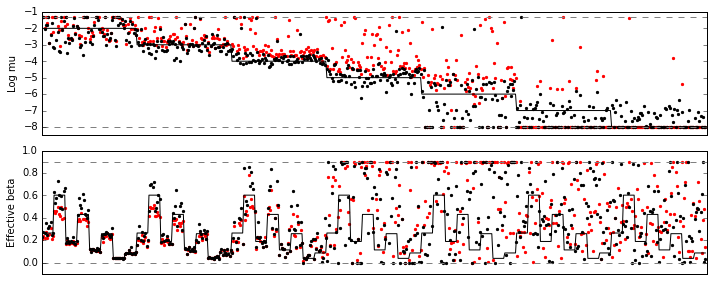

In [2]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

ml_stutter = LoadML(os.path.join(DATAPATH, "simulations", "treestutter_maxlik.tab"), 
                    os.path.join(DATAPATH, "simulations", "treestutter_truth.bed"),
                    os.path.join(DATAPATH, "simulations", "treestutter_strsd.bed"))
ml_stutter_corr = LoadML(os.path.join(DATAPATH, "simulations", "treestutter_maxlik_calcstutter.tab"),
                         os.path.join(DATAPATH, "simulations", "treestutter_truth.bed"), 
                         os.path.join(DATAPATH, "simulations", "treestutter_strsd.bed"))

PlotSimulations([ml_stutter, ml_stutter_corr], estcolors=["red","black"],
                outfile=os.path.join(PLOTDIR, "SupplementalFigure5_perlocus_stutter.pdf"))

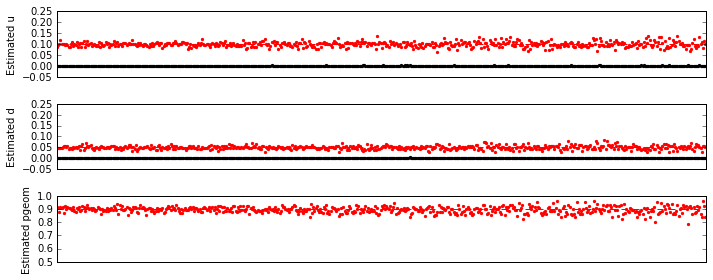

In [7]:
def LoadStutter(stutter, truthfile, strsdfile, minmu=10e-9):
    stutter = pd.read_csv(stutter, sep="\t", names=["chrom","start","end","up","down","pgeom"])
    truth = pd.read_csv(truthfile, sep="\t", names=["chrom","start","end","mu","beta"])
    strsd = pd.read_csv(strsdfile, sep="\t", names=["chrom","start","end","strsd"])
    merged = pd.merge(stutter[["chrom","start","end","up","down","pgeom"]],
                     truth, on=["chrom","start","end"])
    merged = pd.merge(merged, strsd, on=["chrom","start","end"])
    merged = merged[merged["mu"]>=minmu]
    return merged    

# Load data files
nst = LoadStutter(os.path.join(DATAPATH,"simulations","tree_stutter.tab"), 
                  os.path.join(DATAPATH,"simulations","tree_truth.bed"),
                  os.path.join(DATAPATH,"simulations","tree_strsd.bed"))
st = LoadStutter(os.path.join(DATAPATH,"simulations","treestutter_stutter.tab"), 
                  os.path.join(DATAPATH,"simulations","treestutter_truth.bed"),
                  os.path.join(DATAPATH,"simulations","treestutter_strsd.bed"))

def PlotSimulationsStutter(dfs, outfile=None, eff=False):
    paramcolor = "black"
    estcolors = ["black","red"]
    prefixes = ["_x","_y",""]
    if len(dfs) == 1: prefixes = [""]
    data = reduce(lambda x, y: pd.merge(x, y, on=["chrom","start","end","mu","beta","strsd"]), dfs)
    data = data.sort(columns=["mu","beta","strsd"])
    order = range(data.shape[0])
    # Estimates
    numplots = 3
    fig = plt.figure()
    fig.set_size_inches((10,4))
    # Estimated upprob
    trueup = [0, 0.1]
    ax = fig.add_subplot(numplots, 1, 1)
    for i in range(len(dfs)):
        prefix = prefixes[i]
        ax.scatter(order, data["up%s"%prefix], color=estcolors[i], s=5)
        ax.axhline(trueup[i], linestyle="dashed", color=estcolors[i])
    ax.set_xticks([])
    ax.set_xlim(left=0, right=len(order))
    ax.set_ylim(bottom=-0.05, top=0.25)
    ax.set_ylabel("Estimated u")
    # Estimated downprob
    truedown = [0, 0.05]
    ax = fig.add_subplot(numplots, 1, 2)
    for i in range(len(dfs)):
        prefix = prefixes[i]
        ax.scatter(order, data["down%s"%prefix], color=estcolors[i], s=5)
        ax.axhline(truedown[i], linestyle="dashed", color=estcolors[i])
    ax.set_xticks([])
    ax.set_xlim(left=0, right=len(order))
    ax.set_ylim(bottom=-0.05, top=0.25)
    ax.set_ylabel("Estimated d")
    # Estimated pgeom
    truep = [None, 0.9]
    ax = fig.add_subplot(numplots, 1, 3)
    for i in range(len(dfs)):
        if i == 0: continue
        prefix = prefixes[i]
        ax.scatter(order, data["pgeom%s"%prefix], color=estcolors[i], s=5)
        ax.axhline(truep[i], linestyle="dashed", color=estcolors[i])
    ax.set_xticks([])
    ax.set_xlim(left=0, right=len(order))
    ax.set_ylim(bottom=0.5, top=1.0)
    ax.set_ylabel("Estimated pgeom")
    fig.tight_layout()
    if outfile is not None: fig.savefig(outfile)

PlotSimulationsStutter([nst, st], outfile=os.path.join(PLOTDIR,"SupplementalFigure5_perlocus_stutter_params.pdf"))